I. We must first study the data and understand what is needed. First of all, we have to frame the problem: 1. Is learning supervised, unsupervised or consolidating? 
         2. Is it a classification task, a regression task, or something else? 
         3. Should you use serial or online learning techniques?
         
     1. Let's see: it is clearly a typical supervised or learning task, because we are offered labeled training examples (each instance comes with the expected output, ie the average price of housing)
     2. It is also a typical regression task because we are asked to predict a value.More specifically, this is a multiple regression problem, as the system will use multiple features to make a prediction. It is also a matter of univariate regression, since we are trying to predict only one value. If we try to predict multiple values.
It would be a multivariate regression. Finally, there is no continuous stream of data entering the system, there is no special need to adapt to the rapidly changing data, and the data is small enough to fit in the memory.

II.Select a performance measure:
A typical performance measure for regression problems is Root Mean Square Error (RMSE). This gives an idea of how many errors the system usually makes in its predictions, with a higher weight for large errors.
RMSE measures my distance between two vectors, a prediction vector and a target value vector (inputs)
For example, the prices that the system will provide will be fed into a machine learning system and we assume that these prices will be used as such. What if the system converts prices into categories (for example, "cheap", "medium" or "expensive") and then uses those categories instead of prices? In this case, getting the perfect price is not important at all; your system only needs to get the right category. If so, then the problem should have been classified as a classification task, not a regression task. However, this is not the case with our problem.
However, for our problem we will choose a more precise metric called RSqured (r2_score). This metric having values being in the range (0,1) we can interpret it much easier compared to RMSE, we are interested to see the value of the variance of the target variable which is predicted from the characteristic variable.

III. Data exploration
In this step we transform the "raw" data from csv format into a format called DataFrame. A DataFrame is similar to a Python dictionary, where the variable names are the keys and the columns in the DataFrame are the values. A dictionary is represented by key and value.
First, we'll start by uploading and viewing the dataset.
We will see that the data set has a mixture of both numeric and non-numeric features, because it contains values ​​from different ranges, plus it contains a number of missing entries.
We will need to preprocess the dataset to make sure that the machine learning model we choose can make good predictions (machine learning algorithms make predictions only on numerical data).
Once our data is in good shape, we will do an exploratory analysis of the data to build our intuitions.
Finally, we will build a machine learning model that can predict the correct price of houses, the target being the attribute of SalePrice.
To decide which model we will use, we know that in a linear model or rather a linear regression model, the predicted values are continuous or in other words the output of the model is a real value.

1)Import Data

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "FinalProject"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#import os
#import tarfile
#import urllib.request

#DOWNLOAD_ROOT = "https://www.kaggle.com/c/home-data-for-ml-course/data"
#HOUSING_PATH = os.path.join("datasets", "housing")
#HOUSING_URL = DOWNLOAD_ROOT + "?select=test.csv.gz"

#def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  #  os.makedirs(housing_path, exist_ok=True)
   # tgz_path = os.path.join(housing_path, "test.csv.gz")
   # urllib.request.urlretrieve(housing_url, tgz_path)
   # housing_tgz = tarfile.open(tgz_path)
    #housing_tgz.extractall(path=housing_path)
   # housing_tgz.close()

In [3]:
#fetch_housing_data()

In [4]:
#import pandas as pd
#def load_housing_data(housing_path=HOUSING_PATH):
# csv_path = os.path.join(housing_path, "test.csv")
 #return pd.read_csv(csv_path)
#housing = load_housing_data()
#housing.info

In [5]:
import pandas as pd
HOUSING_PATH = os.path.join("datasets", "housing")
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "train.csv")
 return pd.read_csv(csv_path)
housing = load_housing_data()
names=housing.keys()

2)Inspect the Data

In [6]:
housing.info() # Print DataFrame info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We notice from the info function call that we have attributes in the DataFrame that have many missing values, including PoolQOC, Fence, MiscFeature and Alley. We also notice that there are object values ​​(which means that there are string attributes in the dataframe, namely 43 such attributes.

In [7]:
housing.head()#showing first 5 samples of the DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Print summary statistics 
We can use .describe () to see the statistical part of the data,
which is the minimum, maximum, etc., and after mean (average) we can find out whether or not Nan Values are included.
The std row shows the standard deviation, which measures how scattered the values are. The rows of 25%, 50% and 75% show the corresponding percentiles: one percentile indicates the value below which the percentage given by observations in a group of observations falls. For example, 25% of homes have an average price of less than 129975, while 50% are less than 163000. and 75% are less than 214000. 25% (or first quartile), median, and 75% (or the third quartile).

In [8]:
housing.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


3)Handling duplicates values

In [9]:
#search for duplicates values 
duplicates=housing.duplicated()
print(duplicates)
housing[duplicates]

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There is no duplicates rows in the DataFrame! 0 rows x 81columns

4)Handling the missing values

In [10]:
housing.isna()# search for Nan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [11]:
housing.isna().sum() #Count Nan values on each atribute


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

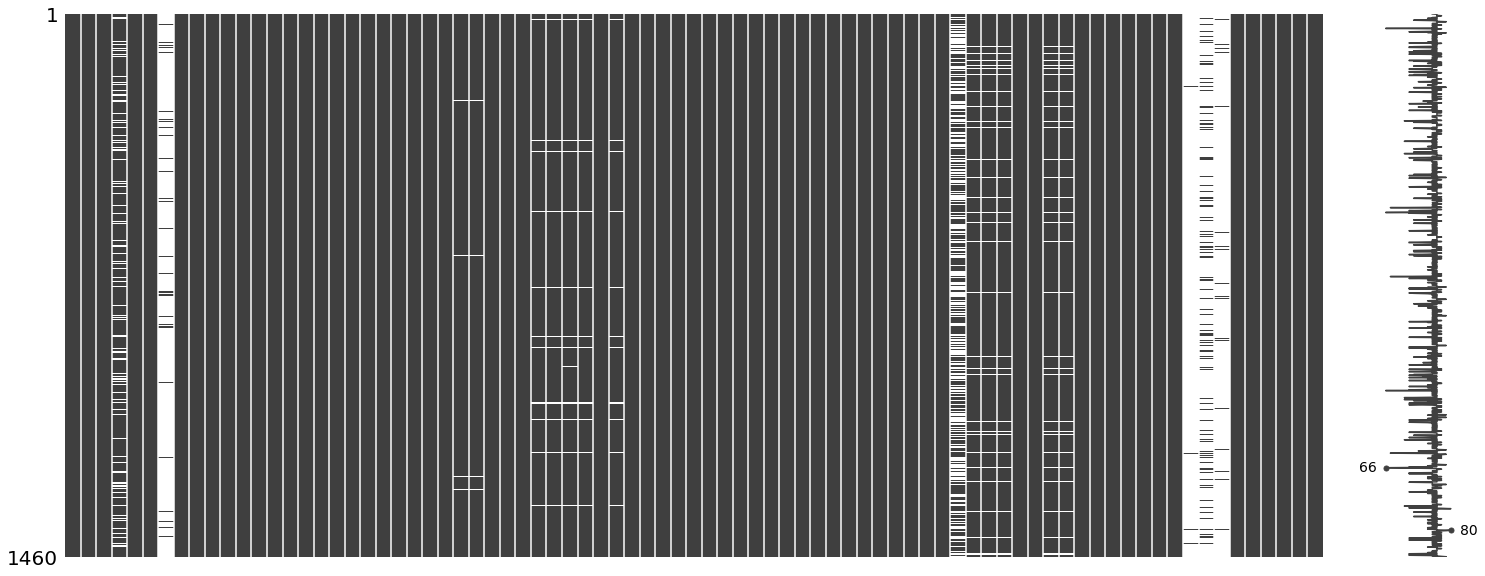

In [12]:
import missingno as msno
#housing=housing.sort_values(by='LotFrontage')
msno.matrix(housing)
plt.show() #showing all Nan values on each atribute 

In [13]:
housing.shape # we have 1460 samples and 81 features

(1460, 81)

5)Initial data exploration before imputation and preprocessing

Saving figure attribute_histogram_plotsInitial


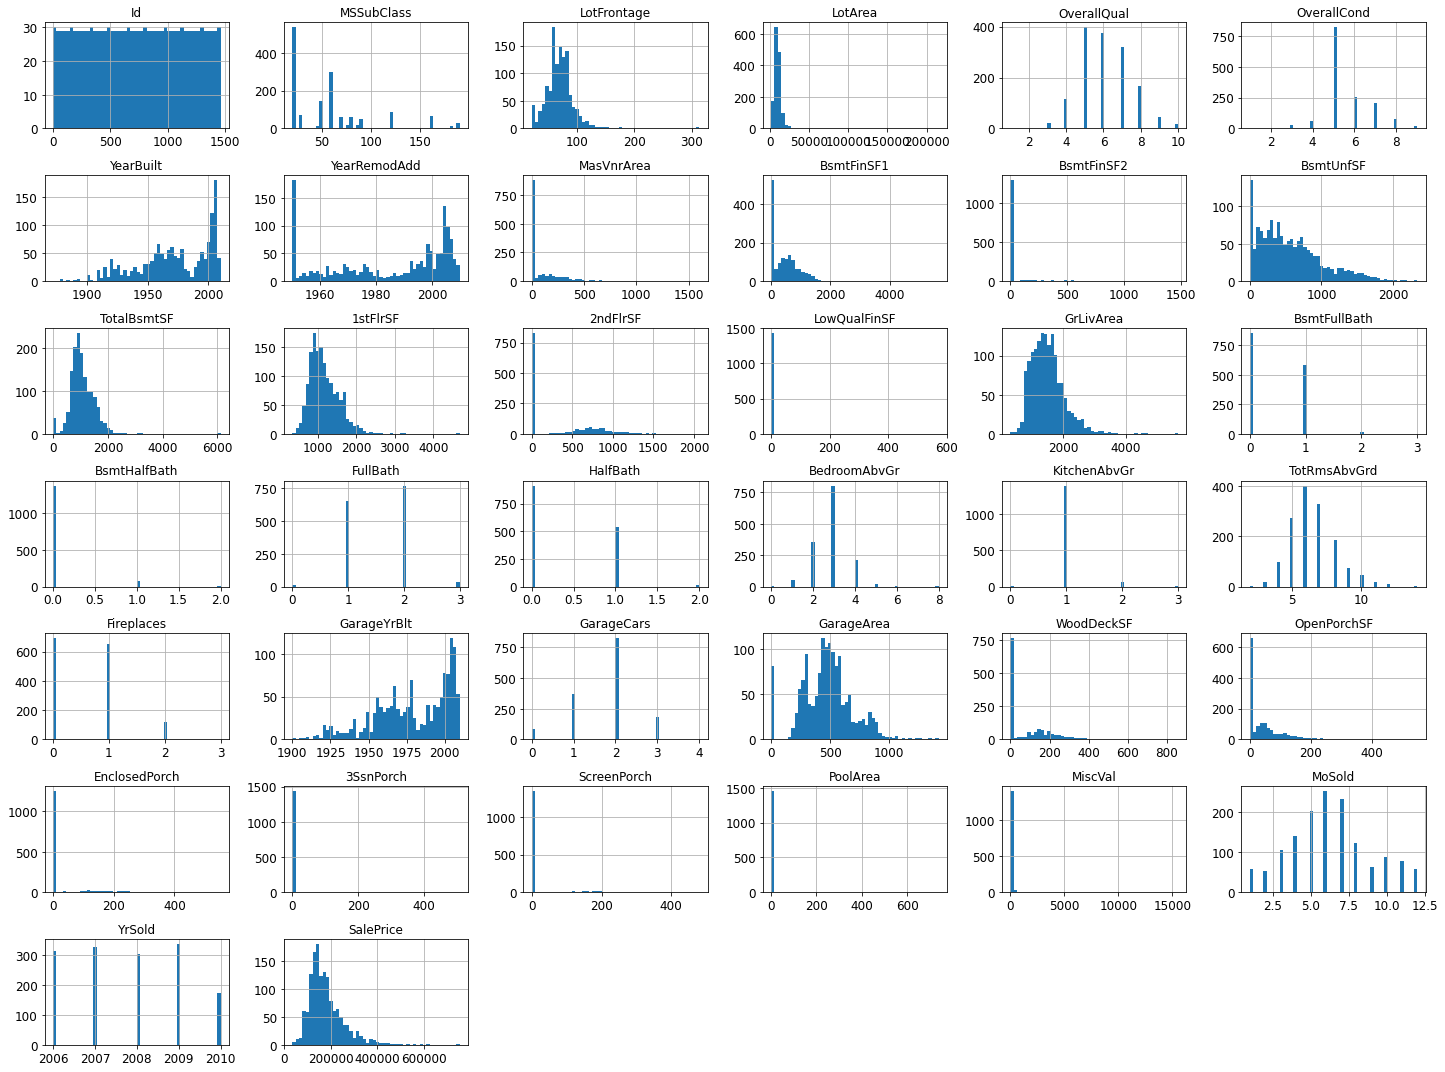

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plotsInitial")
plt.show() 

6) Removing/Drop the attributes that have too many Nan values

In [15]:
housing.drop(['LotShape','MiscFeature','PoolQC','Id'],axis='columns',inplace=True)
housing.shape


(1460, 77)

In [16]:
#housing=housing.drop(housing.loc[(housing['SalePrice'] < 200000) & (housing['GrLivArea'] >4000)].index)
#housing.shape

7) Impute the missing values with mean imputation

In [17]:
# Impute the missing values with mean imputation
housing.fillna(housing.mean(), inplace=True) 
#so as not to change the properties of the distribution, and if I use std to change its shape, I encrypt the data.

# Count the number of NaNs in the dataset to verify
housing.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

8)Impute these missing values with the most common values present in the respective columns.

In [18]:
#We will impute these missing values with the most common values present in the respective columns.
#This is a good practice when it comes to attributing missing values to categorical data in general.

# Iterate over each column of housing
for col in housing.columns:
    # Check if the column is of object type
    if housing[col].dtypes == 'object':
        # Impute with the most frequent value
        housing = housing.fillna(housing[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(housing.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64


9)Preprocessing the data 

In [19]:
#Convert non-numeric data to numbers.
# We scale the characteristic values to a uniform interval to apply the data to the model.

#First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation 
#but also many machine learning models (like XGBoost or GradientBoosting) (and especially the ones developed using scikit-learn) require 
#the data to be in a strictly numeric format. We will do this by using a technique called label encoding.

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
Le=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in housing.columns.to_numpy():
    # Compare if the dtype is object
    if housing[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
       housing[col]=Le.fit_transform(housing[col])
      #scaler = MinMaxScaler(feature_range=(-1,1))
      # rescaled_housing=scaler.fit_transform(housing[col])
      # rescaled_housing_encoded=OneHot.fit_transform(rescaled_housing)
      # rescaled_housing_encoded.toarray()

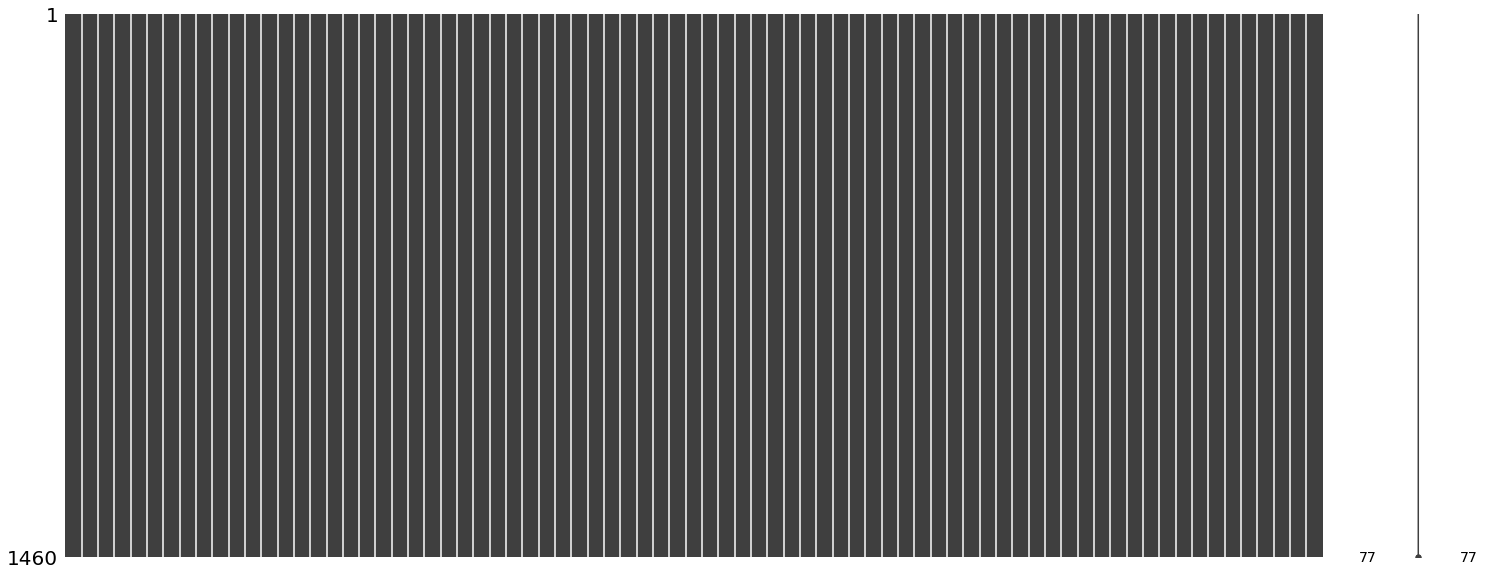

In [20]:
import missingno as msno
msno.matrix(housing)
plt.show()

In [21]:
housing.info()#check if the object data has been converted correctly to numeric data (Are there any null values or not?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

The msno matrix was checked above to see if each attribute that had the string data type was. As you can see, every attribute that was previously object (string) in a previous test is now in numerical form, int / float. String data takes up more memory space, an important thing to note is that the memory used is smaller than the previous test in which the DataFrame showed object data types, namely 661.KB compared to 924.0 KB.

10)Final data exploration after imputation and preprocessing

Saving figure attribute_histogram_plots


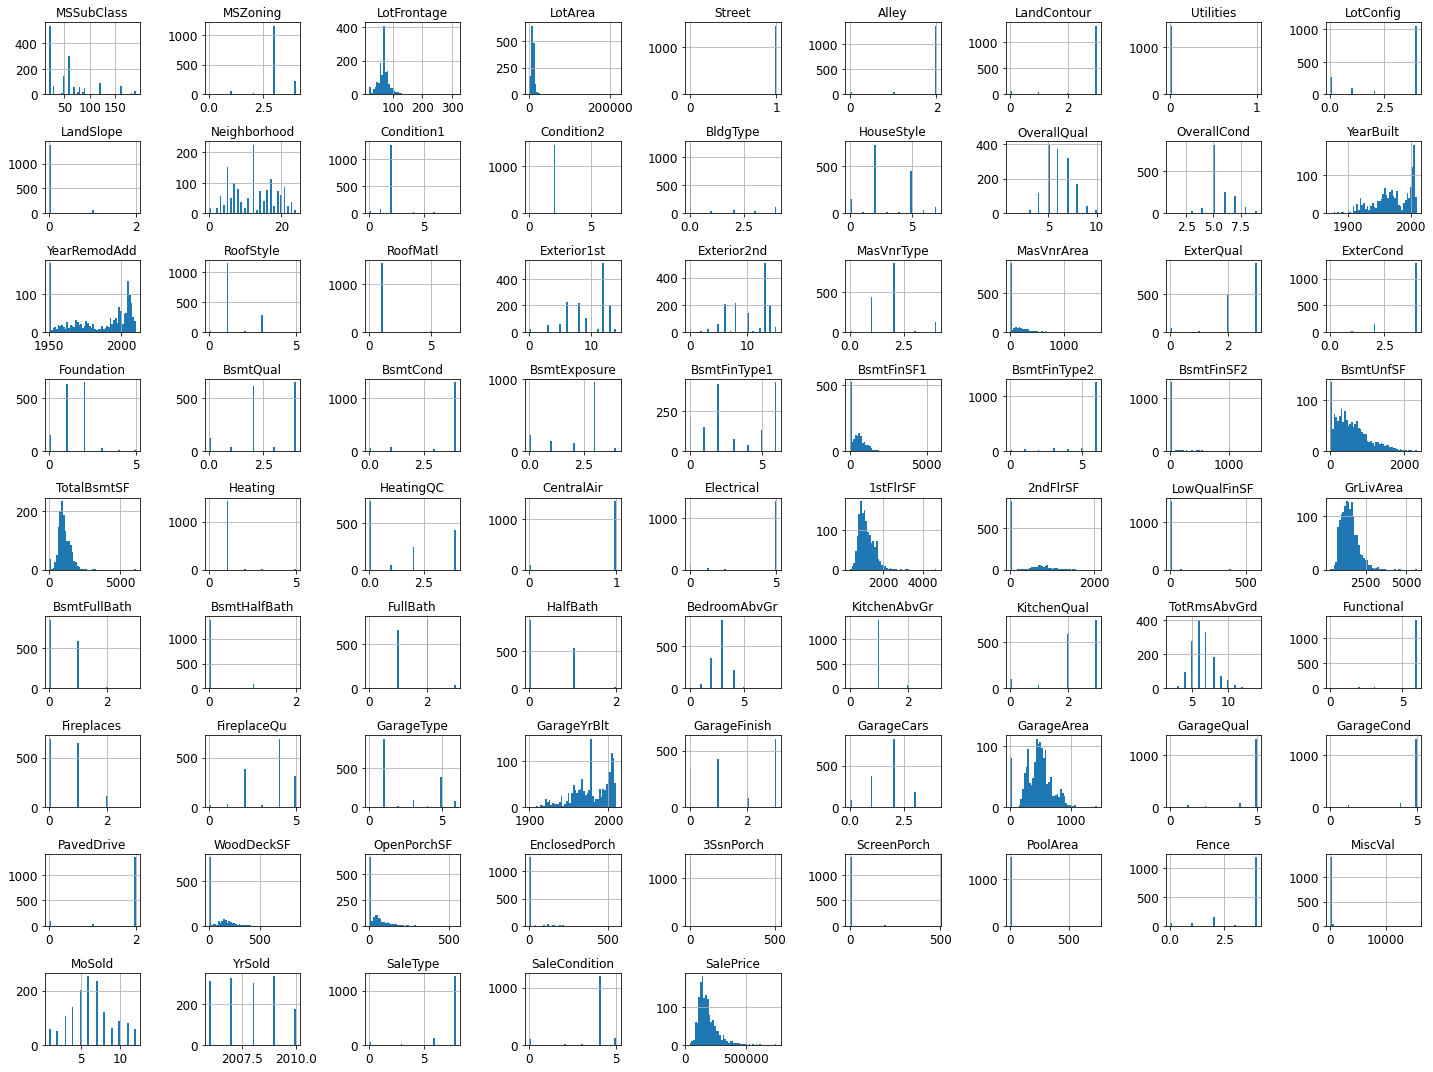

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show() 

11) Testing the best correlations between predictors (allfeatures apart from SalePrice) and target (SalePrice)

We will now correlate our target and all attributes in the DataFrame to see which attribute we will use and further process in close connection with the "SalePrice" target. The correlation is closely related to Pearson's coefficient, which is in the range (-1,1) and quantifies the linear relationship between variables, the correlation works only on linear correlations between variables.

In [23]:
#for col in housing.columns.to_numpy():
    # Compare if the dtype is object
   # if housing[col].dtypes!='object':
corr_matrix = housing.corr() # instantierea corelatiei 

In [24]:
corr_matrix["SalePrice"].sort_values(ascending=False)# application on the SalePrice target


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
GarageType     -0.415283
GarageFinish   -0.514258
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, Length: 77, dtype: float64

12) Exploring the relationships between attributes (the first 3 with the highest correlation) and target.

From a histogram we can see the general shape of the distribution and the central tendency.
The normal distribution or Gaussian distribution if we use for example CDF, would be one that would have the average 0 and the standard deviation of 1. From a scatterplot we can explore the relationships between data.

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', yla

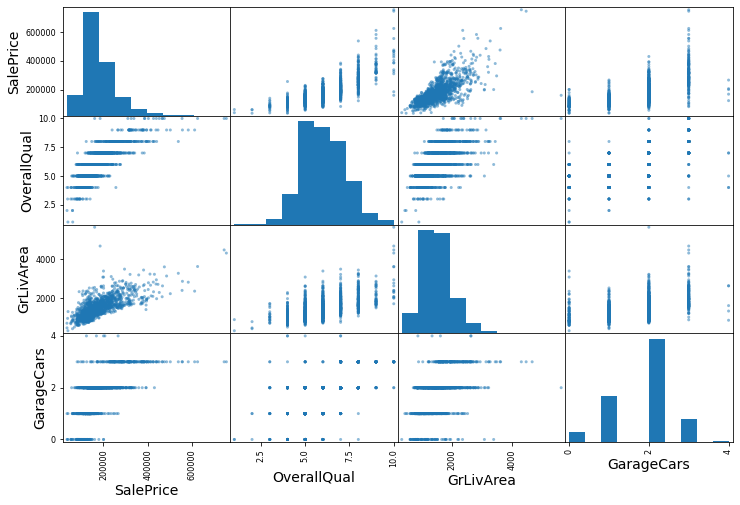

In [25]:
from pandas.plotting import scatter_matrix #relation between attributes and target
attributes = ["SalePrice", "OverallQual", "GrLivArea","GarageCars"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

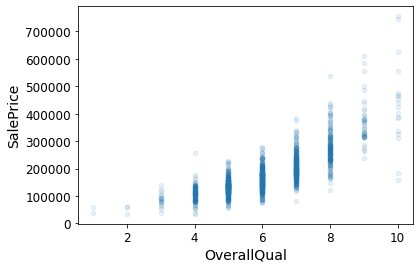

In [26]:
housing.plot(kind="scatter", x="OverallQual", y="SalePrice",alpha=0.1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

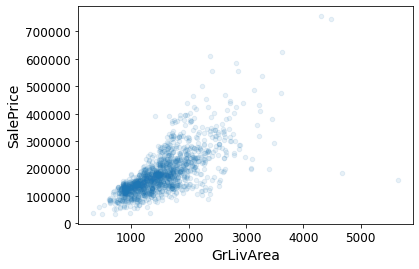

In [27]:
housing.plot(kind="scatter", x="GrLivArea", y="SalePrice",alpha=0.1)

13)Testing the GrLivArea attribute if it resembles or is a normal distribution

<AxesSubplot:>

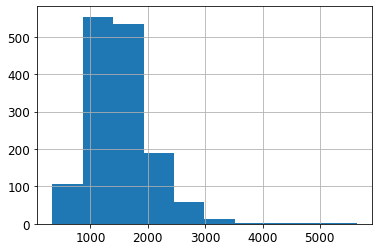

In [28]:
housing["GrLivArea"].hist()
# Living area above ground level (ground) square meters GrLivArea

13.1) PDF for GrLivArea

KDE (Kernel density deviation) is a way to move from a PMF (PMF is the possible distribution of data in the form of probabilities in the data set, ie what percentage of a feature x is found in the data set), to a PDF (mathematical description of the relative probability of observing a value of a continuous variable).

Saving figure PDF for GrLivArea


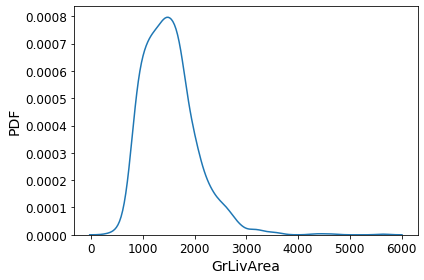

In [29]:
import seaborn as sns 
sns.kdeplot(housing["GrLivArea"])
_=plt.xlabel('GrLivArea')
_=plt.ylabel('PDF')
save_fig("PDF for GrLivArea")

13.2) Testing if GrLivArea is a normal distribution with ECDF

ECDF, the value of y is the fraction of data points that have a value less than the corresponding value of x.
Generally a distribution is a mathematical description of the results.

Saving figure VerifyNormalDistributionOfGrLivArea


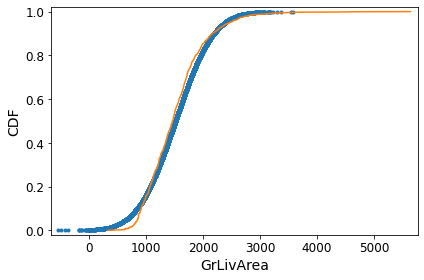

Mean= 1515.463698630137
Std= 525.3003935623229


In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.random import normal
from statsmodels.distributions.empirical_distribution import ECDF
#to get good parameters for a pdf we need to get mean and std directly from the data !!
mean= np.mean(housing["GrLivArea"])
std=np.std(housing["GrLivArea"])
samples=np.random.normal(mean,std,size=10000) # generate samples from normal distribution (discrete data)

ecdf1 =ECDF(samples)
ecdf2=ECDF(housing["GrLivArea"])
_=plt.margins(0.02)
_=plt.plot(ecdf1.x,ecdf1.y, marker='.',linestyle='none')
_=plt.plot(ecdf2.x,ecdf2.y)
_=plt.xlabel('GrLivArea')
_=plt.ylabel('CDF')
save_fig("VerifyNormalDistributionOfGrLivArea")
plt.show()
print("Mean=",mean)
print("Std=",std)


It can be seen from the CDF of the GrLivArea attribute that there is a small error in estimating the standard deviation

We stratified the data according to the most representative / most correlated attribute with the target. Thus, when I did the training using 5 parts of the data, in each part I put values ​​proportional to the size of the bin.

<AxesSubplot:>

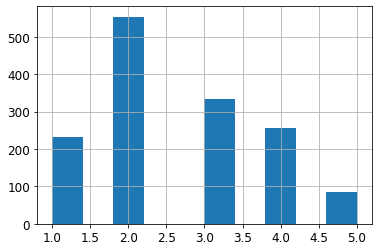

In [31]:
housing["income_cat"] = pd.cut(housing["GrLivArea"],
bins=[300,1000,1500,1800,2400,np.inf],
labels=[1, 2, 3,4,5])
housing["income_cat"].hist()


In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


2    0.380137
3    0.229452
4    0.174658
1    0.157534
5    0.058219
Name: income_cat, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [34]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.158219,0.157534,0.202055,27.705628,-0.432900
2,0.379452,0.380137,0.373288,-1.624549,0.180505
3,0.229452,0.229452,0.226027,-1.492537,0.000000
4,0.174658,0.174658,0.140411,-19.607843,0.000000
5,0.058219,0.058219,0.058219,0.000000,0.000000


In [35]:
housing = strat_train_set.copy() #get o copy of stratified trainings
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)


15)Prepare the data into train and test set for models

In [36]:
from sklearn.model_selection import train_test_split # Construirea modelului 
housing = housing.to_numpy() # mathematical operations are done only on numpy arrays so from the dataframe we build a numpy array
X,y = housing[:,0:76], housing[:,76]# will retain in two variables the predictors respectively the target (i.e. all features in X and the target in y)
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,
                                                    y,
                                                   test_size=0.2,
                                                   random_state=42)


15.1)Scale feature of train set and test set 

In [37]:
 # Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

#pentru modele liniare sa folosesc date standardizate.

15.2)Fitting a linear regression model to the train set ,predict on train set and validate with crossvalidation
Cross-Validation motivation -model performance is dependent on the way data is split 
                            -not representative of the model's ability to generalize
                            -Solution! Cross-Validation

In [38]:
#Implementation and Validation of the Linear Regression model, first we calculate error on the train data then on the test data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(rescaledX_train,y_train)
# Predict the labels of the test set
y_pred_train = linreg.predict(rescaledX_train)
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
# Print RMSE_train
print('Train set RMSE of rf: {:.2f}'.format(RMSE_train))

Train set RMSE of rf: 32331.05


15.3)Fitting a linear regression model to the train set and predict on the test set, validate with CrossValidation

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
linreg = LinearRegression()
linreg.fit(rescaledX_train,y_train)
# Predict the labels of the test set
y_pred_test = linreg.predict(rescaledX_test)
# Evaluate the training set RMSE of dt
RMSE_test = (MSE(y_test, y_pred_test))**(1/2)
# Print RMSE_train
print('Test set RMSE of rf: {:.2f}'.format(RMSE_test))

Test set RMSE of rf: 32656.64


We note that the RMSE error of the linear regression model for the train data is slightly higher after validation than on the test data, which indicates that there are nonlinearities, the regression model is not good enough for our data. This phenomenon occurs when the model is not complex enough to predict the target well enough. Thus, we will test more powerful models, respectively, DecissionTreeRegressor, RandomForest and GradientBoostingRegressor, all of this models can be used for our linear regression problem.

In [40]:
#Validation of the LinearRegression model on the training data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg,X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
linreg_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
display_scores(linreg_rmse_scores)

Scores: [53349.15761682 28256.28629379 27274.31567605 30557.31933373
 34695.38625269 30698.53201355 27071.09593219 25099.42690538
 44594.30699711 75989.64782033]
Mean: 37758.54748416263


16.1) Fitting a DecessionTree Regressor model and predict on train set 

In [41]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6,random_state=42)
# Fit dt to the training set
dt.fit(X_train, y_train)
# Predict the labels of the training set
y_pred_train = dt.predict(X_train)
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
# Print RMSE_train
print('Train set RMSE of rf: {:.2f}'.format(RMSE_train))
print("R Squared Score is:", r2_score(y_train, y_pred_train))

Train set RMSE of rf: 22568.50
R Squared Score is: 0.9145336232742366


16.2) Fitting a DecessionTree Regressor model and predict on test set 

In [42]:
#The Decision Tree model on test data
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.001,random_state=42) 
#min_sample_leaf, to impose a condition of stopping the tree, which each leaf must contain at least 0.1% of training data

# Fit dt to the test set
dt.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_test = dt.predict(X_test)
# Evaluate the training set RMSE of dt
RMSE_test = (MSE(y_test, y_pred_test))**(1/2)
# Print RMSE_train
print('Test set RMSE of rf: {:.2f}'.format(RMSE_test))
print("R Squared Score is:", r2_score(y_test, y_pred_test))

Test set RMSE of rf: 45856.15
R Squared Score is: 0.72772533326364


16.3) Validation DecissionTreeRegressor on Train set with Cros-Validation on 10 k-folds

In [43]:
#Validation of Decision Tree model on training data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [44]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [41423.01989754 36163.8772694  37548.36633349 36716.60127814
 37863.1924071  43255.6081361  41178.80092108 37165.19124703
 57585.21575372 74351.07875096]
Mean: 44325.09519945546
Standard deviation: 11663.166898200081


16.4)Optimize RegressionTreeRegressor with GridSearch

# Define the dictionary 'params_rf'    
#folosim GridSearhCV, un algoritm de optimizare al modelelor CV insemnand ca se foloseste in acelasi timp CrossValidation
#pentru a valida datele 
params_dt= {
             'max_depth': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV
# Instantiate grid_rf
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
grid_dt.fit(X_train,y_train)
# Extract the best estimator
best_model_dt = grid_dt.best_estimator_
# Predict test set labels
y_pred = best_model_dt.predict(X_test)
# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print("R Squared Score is:", r2_score(y_test, y_pred))
grid_dt.best_estimator_

The match between the predicted label and the test label is 78.22%
In the following, we will choose a model that takes also the nonlinear samples in our distribution better than DecissionTreeRegresor, RandomForestRegressor.

17.1) fit RandomForestRegressor and predict on train set

In [45]:
#Rmse and RSquared view on RF train data
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
# Fit rf to the training set
rf.fit(X_train, y_train)
# Predict the labels of the training set
y_pred_train = rf.predict(X_train)
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
# Print RMSE_train
print('Train set RMSE of rf: {:.2f}'.format(RMSE_train))
print("R Squared Score is:", r2_score(y_train, y_pred_train))

Train set RMSE of rf: 12400.43
R Squared Score is: 0.9741973892177153


17.2) fit RandomForestRegressor and predict on test set

In [46]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
rf = RandomForestRegressor(random_state=42)
# Fit rf to the training set            
rf.fit(X_train, y_train)                           
# Predict the test set labels
y_pred_test = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred_test)**(1/2)
# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print("R Squared Score is:", r2_score(y_test, y_pred_test))


Test set RMSE of rf: 33473.21
R Squared Score is: 0.8549202875278139


17.3) Validation RandomForestRegressor model on Train set with crosvalidation with 10 k-folds

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(rf_rmse_scores)

Scores: [44047.9155863  26844.38370562 24680.47648565 24639.22183557
 27623.49390571 27238.87090006 28257.48328404 23742.85257876
 43717.25459494 51199.91795072]
Mean: 32199.18708273592
Standard deviation: 9534.318798085656


As can be seen, the model predicted on the test data has an error almost 10% higher than the one predicted on the training data, which denotes a variance in the system, so hyperparameters of the model must be adjusted)

17.4) Optimize RandomForestRegressor with GridSearch

In [48]:
rf.get_params().keys() #hiperparametri ai RandomForestRegressor

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

# Define the dictionary 'params_rf'    
#we use GridSearhCV, a model optimization algorithm, CV means that CrossValidation is used at the same time to validate #the data
params_rf= {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
grid_rf.fit(rescaledX_train,y_train)
# Extract the best estimator
best_model_rf = grid_rf.best_estimator_
# Predict test set labels
y_pred = best_model_rf.predict(rescaledX_test)
# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print("R Squared Score is:", r2_score(y_test, y_pred))
grid_rf.best_estimator_

As can be seen from the model implemented with RandomForest, the accuracy of the prediction increased from 85.49% to 87.19%, but not enough to get 97.4% when we predict on train set. So we will use better model, GradientBoostingRegressor.

18.1) Fit GradientBoostingRegressor and predict on training set

We are trying with the GradientBoosting algorithm. Gradient Boosting involves a thorough search procedure. It trains using the residual errors of its predecessor as labels. That is, the match of each predictor is done by training it using the residual error of its predecessor as the label. The estimator for this algorithm is the Decision Tree. We know that when descending in gradient, the local minimum of a function is calculated and in Gradient Boosting (for trees) it corrects the error of the previous tree, and when labeling the next one it uses the residual errors of the predecessor. The algorithm has a tree and builds the best one possible. Both methods are for regression, but gradient boosting is for the decision tree and gradient descent for linear regression.
Both Gradient boost and Adaboost scale decision trees, however, Gradient boost scales all trees by the same amount, unlike Ada boost.

Regularization of the GradientBoosting model
GBRT provides three buttons to control override: shaft structure, contraction and randomization.
----- Tree structure -----
The depth of the individual trees is an aspect of the complexity of the model. The depth of the trees practically controls the degree of interactions of the features that your model can match. For example, if you want to capture the interaction between the latitude of a feature and the longitude of a feature, your trees need at least two depths to capture this. Unfortunately, the degree of interaction with the features is not known in advance, but it is usually good to assume that it is quite low - in practice, a depth of 4-6 usually gives the best results. In scikit-learn you can constrain the depth of the trees using the #max_depth argument.
Another way to control the depth of the trees is by applying a lower limit on the number of samples in a leaf: this will avoid unbalanced splits if a leaf is formed for a single extreme data point. In scikit-learn you can do this using the min_samples_leaf argument. This is actually a way to introduce bias into your model in hopes of reducing variance as well.
------- Shrinkage ------
The most important regularization technique for GBRT is contraction (Shrinkage): the idea is basically to do a slow learning, reducing the predictions of each individual tree with a small scalar, learning rate (learning_rate). In doing so, the model must consolidate the concepts. A lower learning rate requires a higher number of n_estimators to reach the same level of training error - so its trading time is against accuracy.

--Stochastic Gradient Boosting ---
Similar to RandomForest, introducing randomization into the tree building process can lead to greater accuracy. Scikit-learn offers two ways to introduce randomization: a) subsampling the training set before each tree grows (subsample) and b) subsampling the features before finding the best split node (max_features). Experience has shown that the latter works better if there are a sufficient number of features (> 30). One thing that stands out is that both options reduce running time.

In [49]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate gb
gba = GradientBoostingRegressor(random_state=42) 
# we will match the gb gradient regression we instantiated earlier and predict the train set labels.
# Fit gb to the training set
gba.fit(X_train, y_train)

# Predict train set labels
y_pred_train = gba.predict(X_train)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_train = MSE(y_train, y_pred_train)

# Compute RMSE
rmse_train= mse_train**(1/2)

# Print RMSE
print('Train set RMSE of gb: {:.3f}'.format(rmse_train))
print("R Squared Score is:", r2_score(y_train, y_pred_train))

Train set RMSE of gb: 13975.156
R Squared Score is: 0.9672279831311222


18.2) Fit Stohastic GradientBoostingRegressor and predict on test set

In [58]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate gb
gb = GradientBoostingRegressor(random_state=42)
# we will match the gb gradient regression we instantiated earlier and predict the test set labels.
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred_test = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
# Compute MSE
mse_test = MSE(y_test, y_pred_test)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))
print("R Squared Score is:", r2_score(y_test, y_pred_test))


Test set RMSE of gb: 28709.112
R Squared Score is: 0.8932785932737226


It is noticed that the error on the training data is much smaller than the one on the test data, which would mean that when we shared the data 80% were training data and only 20% test data, as we have more values for the test data, on which the prediction is made, the better the machine learning model can learn the better accuracy should be. We will have to optimize the model using RandomGridSearchCV, and after optimization according to the results obtained hyperparameters of the model used on the training data so that the two errors are equal or as close as possible, to be sure that we no longer have what is called overfitting or underfitting.

from xgboost import XGBRegressor
XGBR = XGBRegressor(n_estimators=1058,
                    learning_rate=0.06,
                    random_state=44)
XGBR.fit(rescaledX_train, y_train,early_stopping_rounds=5, 
        eval_set=[(rescaledX_train, y_train)],
        verbose=False)

# Predict test set labels
y_pred = XGBR.predict(rescaledX_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))
print("R Squared Score is:", r2_score(y_test, y_pred))
print(XGBR.score(rescaledX_test,y_test))


18.3) Optimize Stohastic GradientBoostingRegressor with RandomGridSearchCV and validate on Test set with crosvalidation with 10 k-folds

For Hyperparameter Tuning we can use either GridSearchCV (grid search and validation) or RandomGridSearchCV. In this tuning procedure (GridSearchCV), cross-validation is performed by k-fold for each point in the grid, ie for each choice of hyperparameter or combination of hyperparameters. In this way we choose the best combination of hyperparameters that would fit our model. But from a computational point of view, this optimization algorithm will not help us because we have quite a lot of samples to process. Thus, we will use RandomGridSearchCV which is very similar to GridSearchCV but much faster from a computational point of view, ie for example testing with GridSearchCv we noticed that the whole process takes about 15 minutes, with RandomSearchCv the whole process takes a minute and a half, maximum 2 Thus, at the same time with RandomSearchCV we can try to get the best estimator (the best hyperparameters) in a much shorter time. RandomGridSearchCV and cross validation are done on the training data, after we have chosen the best estimator using "best_estimator_" we save it in a variable and we are going to make the prediction on the test data.

In [51]:
gb.get_params().keys() #find parameters for GradientBoostingRegressor

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

subsample: the growth of each tree on 20/50/90% of the training data

n_estimators: the number of trees

max_depth: the depth of each tree, Used to control the overlap, the greater the depth will allow the model to learn very specific relationships of a certain sample.

max_features: The number of features to consider when looking for the best split. These will be selected at random. As a general rule, the square root of the total number of features works great, but we should check up to 30-40% of the total number of features. Higher values may lead to over-adjustment, but may depend on the case.

learning_rate: This determines the impact of each tree on the final result. GBM works with an initial estimate that is updated using the result of each tree. The learning parameter controls the magnitude of this change in estimates.
Lower values are generally preferred because they make the model robust to the specific characteristics of the shaft and thus allow it to generalize well.
Lower values would require more trees to shape all relationships and would be computationally expensive.
min_samples_split: Defines the minimum number of samples (or comments) that are needed in a node to be considered for division. Used to control over-fitting. Higher values prevent a model from learning relationships that could be very specific to the particular sample selected for a tree.
min_samples_leaf: Defines the minimum samples (or observations) required in a terminal node or leaf.
Used to control over-fitting similar to min_samples_split. In general, lower values should be chosen for unbalanced class issues, as the regions where the minority class will be in the majority will be very small.

In [57]:
from sklearn.model_selection import RandomizedSearchCV
subsample= [0.9, 0.5, 0.2]
n_estimators = [100, 400, 700, 1000]
max_depth = [2, 3, 4, 6]
max_features = ['sqrt',1,0.1]
learning_rate= [0.1, 0.05,0.1]
min_samples_leaf = [1, 2, 4, 6] 
min_samples_split = [2, 4, 6]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'learning_rate': learning_rate,
    'subsample': subsample,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split':min_samples_split,
}
# Set up the random search with 10-fold cross validation
random_cv = RandomizedSearchCV(estimator=gb ,
            param_distributions=hyperparameter_grid,
            cv=10,
            scoring = 'neg_mean_absolute_error',
            verbose=1,
            n_jobs=-1 ,             
            random_state=42)
random_cv.fit(X_train,y_train)
# Extract the best estimator
best_model_GBR= random_cv.best_estimator_
# Predict test set labels
y_predbest = best_model_GBR.predict(X_test)
# Compute rmse_test
rmse_test = MSE(y_test, y_pred_test)**(1/2)
# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print("R Squared Score is:", r2_score(y_test, y_pred_test))
print(random_cv.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Test RMSE of best model: 21278.022
R Squared Score is: 0.9413761208203277
GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features=0.1,
                          min_samples_leaf=2, n_estimators=400, random_state=42,
                          subsample=0.9)


As can be seen, the error using the train data after adjusting the hyperparameters when the model was instantiated and the error using the test data differ by approximately 2.64%, which indicates that the model is a good one and is in the margin of 10% difference between the model applied on the data of the match between the predicted label and the test label is 94.13%.
GradientBoostingRegressor (learning_rate=0.05, max_depth=2, max_features='sqrt',
                          min_samples_leaf=2, n_estimators=1000, random_state=42,
                          subsample=0.9)
This is the best estimator, with hyperparameters found by RandomizedSearchCV. Using RandomizedSearchCV we obtained the best hyperparameters and an accuracy of about 4.79% compared to the previous test where hyperparameters were not adjusted so that the accuracy was as high as possible.

# Define the dictionary 'params_rf'    
#we use GridSearhCV, a CV template optimization algorithm meaning CrossValidation is used at the same time
#to validate the data
parameters_gb = { 'subsample'    : [0.9, 0.5, 0.2],      
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [2,4,6],
                  'max_features': [0.1,'sqrt'],
                  'learning_rate': [0.1, 0.05],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split':[2, 4, 6],
                 }
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import r2_score
# Instantiate grid_rf
grid_GBR = GridSearchCV(estimator=gb,
                       param_grid=parameters_gb,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)
grid_GBR.fit(rescaledX_train,y_train)
# Extract the best estimator
best_model_GBR= grid_GBR.best_estimator_
# Predict test set labels
y_pred = best_model_GBR.predict(rescaledX_test)
# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print("R Squared Score is:", r2_score(y_test, y_pred))
print(grid_GBR.best_estimator_)

18.4)Adjusting the hyperparameters of the model used to predict on the train data

In [53]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate gb
gba = GradientBoostingRegressor(max_depth=2,n_estimators=117,random_state=42) 
#max_depth=2,n_estimators=72,max_features=0.7,learning_rate=0.1,random_state=42
# we will match the gb, we instantiated earlier and predict the train set labels.
# Fit gb to the training set
gba.fit(X_train, y_train)

# Predict train set labels
y_pred_train = gba.predict(X_train)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_train = MSE(y_train, y_pred_train)

# Compute RMSE
rmse_train= mse_train**(1/2)

# Print RMSE
print("R Squared Score is:", r2_score(y_train, y_pred_train))

R Squared Score is: 0.9413135036410937


18.5) Results from prediction on test set 

Saving figure PredictedAndOriginal


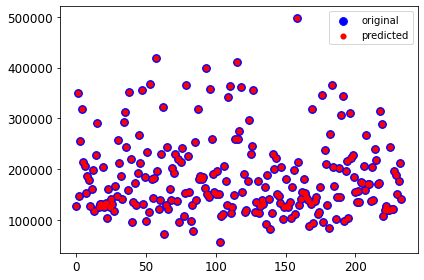

In [59]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_predbest , s=60, color="blue", label="original")
plt.scatter(x_ax, y_predbest , lw=0.1, color="red", label="predicted")
plt.legend()
save_fig("PredictedAndOriginal")
plt.show() 


18.6) Visualization of the characteristics that had the greatest impact on the prediction using optimized GradientBoostingRegressor.

Characteristics often do not contribute equally to predicting the target response. When interpreting a model, the first question is usually: What are those important features and how do they help predict the target response?
A GBRT model derives this information from the adapted regression trees that intrinsically select the characteristics by choosing the appropriate division points. You can access this information through the instance attribute:
GBModel.feature_importances_.

Saving figure Feature Importance (MDI)


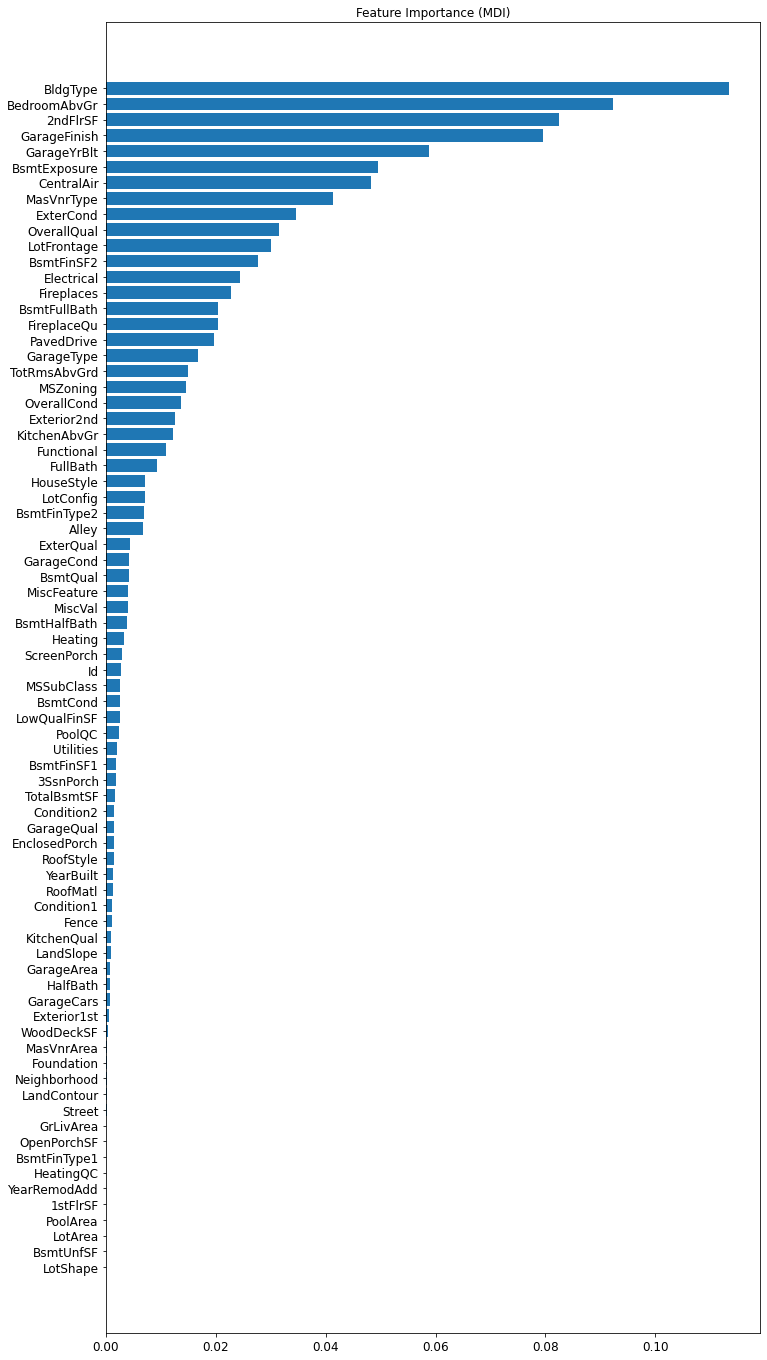

In [60]:
feature_importance = best_model_GBR.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(20, 19))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(names)[sorted_idx])
plt.title("Feature Importance (MDI)")
save_fig("Feature Importance (MDI)")

parameters_gb = {"learning_rate": 0.05,
               "max_depth": 2,
               "max_features": 'sqrt',
               "n_estimators": 400,
               "min_samples_leaf": 2,
               "subsample": 0.9}
test_score = np.zeros ((parameters_gb ["n_estimators"],), dtype = np.float64)
for i, y_pred in enumerate (best_model_GBR.staged_predict (X_test)):
    test_score [i] = best_model_GBR.loss_ (y_test, y_pred)

fig = plt.figure (figsize = (6, 6))
plt.subplot (1, 1, 1)
plt.title ("Deviance")
plt.plot (
    np.arange (parameters_gb ["n_estimators"]) + 1,
    best_model_GBR.train_score_,
    "b-",
    label = "Training Set Deviance",
)
plt.plot (
    np.arange (parameters_gb ["n_estimators"]) + 1, test_score, "r-", label = "Test Set Deviance"
)
plt.legend (loc = "upper right")
plt.xlabel ("Boosting Iterations")
plt.ylabel ("Deviance")
fig.tight_layout ()
save_fig ("betweenTrainingSetAndTestSet")
plt.show ()

